### Criando modelo usando a base de dados Diamonds

In [115]:
# Só consegui importar scikitplot depois de instalar pelo pip, conforme abaixo
#pip install scikit-plot

In [114]:
import itertools                    # pacote para criar combinações de variáveis
import pandas as pd                 # pacote pandas
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn import model_selection # importando pacote para sample
from sklearn import pipeline
from sklearn import ensemble
from sklearn import linear_model
from sklearn import tree
from sklearn import decomposition
from sklearn import metrics

from feature_engine import encoding
from feature_engine import transformation

In [4]:
# Importando a base de dados

df = pd.read_excel("dinamonds.xlsx")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
# Selecionando variáveis categóricas
# Mostrando passo a passo como selecionar as variáveis

df.dtypes                                       # 1 mostra todas as variáveis e os tipos.
df.dtypes == "object"                           # 2 mostra as variáveis que são categóricas.
df.dtypes[df.dtypes == "object"]                # 3 selecionado somente as variáveis categóricas.
df.dtypes[df.dtypes == "object"].index          # 4 cria indices para os elementos.
df.dtypes[df.dtypes == "object"].index.tolist() # 5 transforma os índices em uma lista.

cat_features = df.dtypes[df.dtypes == "object"].index.tolist() # Aqui portanto temos todas as variáveis categóricas
cat_features.remove("cut") # retirar a variável "cut", pois ela é a variável target
cat_features

['color', 'clarity']

In [22]:
# Selecionando a variável target.

target = "cut"
target

'cut'

In [24]:
# Selecionando variáveis numéricas
# vamos aproveitar o código que fizemos anteriomente e fazer uma pequena alteração. Ao invés de "==" vamos usar "!=" no
# no final, atribuindo o resultado aa variável num_features.

num_features = df.dtypes[df.dtypes != "object"].index.tolist()
num_features

# para facilitar na próxima fase,sample, vamos criar uma variável única para juntar as variáveis numéricas e categóricas

features = cat_features + num_features
features

['color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

### Sampling

In [25]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features],
                                                                    df[target],
                                                                    test_size = 0.8,
                                                                    random_state = 42)

### Explore

### Modify

In [33]:
# Criando onehot para mapear todos as possibilidades de dummies
onehot = encoding.OneHotEncoder(variables=cat_features)

# Criando combinações possiveis de variáveis para tunar modelo.
variables_log = []
for L in range(1, len(num_features)+1):
    variables_log += [[list(i) for i in itertools.combinations(num_features,L)]]
    
log_transformation = transformation.LogTransformer()

### Modeling

In [37]:
### modelo random forest
model_rf = ensemble.RandomForestClassifier()
pca = decomposition.PCA()


In [38]:
### montando o pipeline

model_pipeline = pipeline.Pipeline([["onehot",onehot],
                                    ["pca",pca],
                                    ["model_RF",model_rf]])

In [39]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('onehot', OneHotEncoder(variables=['color', 'clarity'])),
                ('pca', PCA()), ['model_RF', RandomForestClassifier()]])

In [40]:
# Analisando a situação da base de treino
# base antes da transformação mostram as variáveis em sua forma natural
x_train

,color,clarity,carat,depth,table,price,x,y,z
46252,D,SI1,0.57,61.0,57.0,1754,5.31,5.34,3.25
17290,F,VS2,1.00,61.9,58.0,6927,6.41,6.49,3.99
41996,D,VS1,0.43,61.6,56.0,1264,4.86,4.85,2.99
50569,E,SI2,0.75,62.1,57.0,2278,5.81,5.85,3.62
760,F,SI1,0.81,61.7,57.0,2858,6.00,6.05,3.72
...,...,...,...,...,...,...,...,...,...
11284,I,VS2,1.05,62.4,59.0,4975,6.48,6.51,4.05
44732,D,VS1,0.47,61.0,55.0,1617,5.03,5.01,3.06
38158,F,IF,0.33,60.3,58.0,1014,4.49,4.46,2.70
860,J,SI1,0.90,62.8,59.0,2871,6.13,6.03,3.82


In [43]:
# agora temos os valores das variáveis após a transformação "onehot", "pca"
# temos agora componentes, uma combinação linear de outras.

model_pipeline[:-1].transform(x_train)

array([[-2.16483282e+03, -8.84873762e-02,  7.71377704e-01, ...,
         1.74846525e-02,  1.44111261e-16, -1.70319712e-16],
       [ 3.00816755e+03,  2.20315753e-01, -2.18531824e-01, ...,
         3.73902056e-02,  5.33338331e-18, -1.76640465e-17],
       [-2.65483314e+03, -1.22806735e+00,  5.43040006e-01, ...,
        -7.01813448e-03,  3.30889589e-17, -2.67464227e-16],
       ...,
       [-2.90483322e+03,  1.03914394e+00,  1.24392224e+00, ...,
        -2.10574238e-02,  1.70668266e-16, -6.56491279e-17],
       [-1.04783226e+03,  1.27791884e+00, -1.55816282e+00, ...,
        -7.72886334e-02,  3.66155866e-16, -1.42564137e-16],
       [ 2.40116782e+03,  7.52256090e-01,  1.12486764e+00, ...,
        -2.39614359e-02,  1.05375537e-17,  1.03766597e-16]])

In [50]:
# Verificando a capacidade de explicação dos componentes.
# Podemos ver somente um componente explica 99,99% de todas as variáveis.
# Isso significa que não precisamos usar todas as variáveis para montar o modelo.

pd.Series(pca.explained_variance_ratio_).round(6)*100

0     99.9999
1      0.0000
2      0.0000
3      0.0000
4      0.0000
5      0.0000
6      0.0000
7      0.0000
8      0.0000
9      0.0000
10     0.0000
11     0.0000
12     0.0000
13     0.0000
14     0.0000
15     0.0000
16     0.0000
17     0.0000
18     0.0000
19     0.0000
20     0.0000
21     0.0000
dtype: float64

In [53]:
# Com base nessa nova informação referente a quantidade de variáveis, vamos retreinar o modelo.

pca = decomposition.PCA(n_components = 2)

model_rf = ensemble.RandomForestClassifier()

model_pipeline = pipeline.Pipeline([["onehot", onehot],
                                    ["pca", pca],
                                    ["mode_RF", model_rf]])

In [54]:
# Retreinamento do modelo

model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('onehot', OneHotEncoder(variables=['color', 'clarity'])),
                ('pca', PCA(n_components=2)),
                ['mode_RF', RandomForestClassifier()]])

In [56]:
# Refazendo os valores das variáveis após a transformação "onehot", "pca"
# O número de variáveis agora reduziu.

model_pipeline[:-1].transform(x_train)

array([[-2.16483282e+03, -8.84873762e-02],
       [ 3.00816755e+03,  2.20315753e-01],
       [-2.65483314e+03, -1.22806735e+00],
       ...,
       [-2.90483322e+03,  1.03914394e+00],
       [-1.04783226e+03,  1.27791884e+00],
       [ 2.40116782e+03,  7.52256090e-01]])

In [85]:
# agora vamos montar o grid do modelo random forest

onehot = encoding.OneHotEncoder(variables=cat_features, drop_last_binary=True)

pca = decomposition.PCA()

model_rf = ensemble.RandomForestClassifier()

model_pipeline = pipeline.Pipeline([["onehot", onehot],
                                    ["pca", pca],
                                    ["mode_RF", model_rf]])

params = {"pca__n_components":list(range(1,len(features)+1)),
          "mode_RF__n_estimators":[100,200,300,600,700],
          "mode_RF__max_depth":[5,7,10,15],
          "mode_RF__criterion":["gini", "entropy"]}

grid_rf = model_selection.GridSearchCV(model_pipeline, params, n_jobs = -1, verbose = 2, cv=3)

#grid_rf.fit(x_train, y_train)

In [86]:
# mesmo modelo random forest anterior mais simplificado para conseguir rodar.

onehot = encoding.OneHotEncoder(variables=cat_features, drop_last_binary=True)

pca = decomposition.PCA()

model_rf = ensemble.RandomForestClassifier()

model_pipeline = pipeline.Pipeline([["onehot", onehot],
                                    ["pca", pca],
                                    ["mode_RF", model_rf]])

params = {"pca__n_components":[1,2,3],
          "mode_RF__n_estimators":[100,200,300,700],
          "mode_RF__max_depth":[5,7,10],
          "mode_RF__criterion":["gini", "entropy"]}

grid_rf = model_selection.GridSearchCV(model_pipeline, params, n_jobs = -1, verbose = 2, cv=3)

grid_rf.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['onehot',
                                        OneHotEncoder(drop_last_binary=True,
                                                      variables=['color',
                                                                 'clarity'])],
                                       ['pca', PCA()],
                                       ['mode_RF', RandomForestClassifier()]]),
             n_jobs=-1,
             param_grid={'mode_RF__criterion': ['gini', 'entropy'],
                         'mode_RF__max_depth': [5, 7, 10],
                         'mode_RF__n_estimators': [100, 200, 300, 700],
                         'pca__n_components': [1, 2, 3]},
             verbose=2)

In [82]:
# Estou colocando este comando para pegarem certinho o nome da chave de cada parâmetro.
# qualquer erro, da xabu
grid_rf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__onehot', 'estimator__pca', 'estimator__mode_RF', 'estimator__onehot__drop_last', 'estimator__onehot__drop_last_binary', 'estimator__onehot__ignore_format', 'estimator__onehot__top_categories', 'estimator__onehot__variables', 'estimator__pca__copy', 'estimator__pca__iterated_power', 'estimator__pca__n_components', 'estimator__pca__random_state', 'estimator__pca__svd_solver', 'estimator__pca__tol', 'estimator__pca__whiten', 'estimator__mode_RF__bootstrap', 'estimator__mode_RF__ccp_alpha', 'estimator__mode_RF__class_weight', 'estimator__mode_RF__criterion', 'estimator__mode_RF__max_depth', 'estimator__mode_RF__max_features', 'estimator__mode_RF__max_leaf_nodes', 'estimator__mode_RF__max_samples', 'estimator__mode_RF__min_impurity_decrease', 'estimator__mode_RF__min_impurity_split', 'estimator__mode_RF__min_samples_leaf', 'estimator__mode_RF__min_samples_split', 'estimator__mode_RF__m

In [89]:
# agora vamos montar o grid do modelo tree

onehot = encoding.OneHotEncoder(variables=cat_features, drop_last_binary=True)

pca = decomposition.PCA()

model_tree = ensemble.RandomForestClassifier()

model_pipeline_tree = pipeline.Pipeline([["onehot", onehot],
                                    ["pca", pca],
                                    ["mode_tree", model_rf]])

params = {"pca__n_components":list(range(1,len(features)+1)),
          "mode_tree__max_depth":[5,7,10,15],
          "mode_tree__criterion":["gini", "entropy"]}

grid_tree = model_selection.GridSearchCV(model_pipeline, params, n_jobs = -1, verbose = 2, cv=3)

#grid_tree.fit(x_train, y_train)

In [98]:
# agora vamos montar o grid do modelo tree com parâmetros reduzidos

onehot = encoding.OneHotEncoder(variables=cat_features, drop_last_binary=True)

pca = decomposition.PCA()

model_tree = tree.DecisionTreeClassifier()

model_pipeline_tree = pipeline.Pipeline([["onehot", onehot],
                                    ["pca", pca],
                                    ["mode_tree", model_tree]])

params = {"pca__n_components":[1,2,3],
          "mode_tree__max_depth":[5,7,10,15],
          "mode_tree__criterion":["gini", "entropy"]}

grid_tree = model_selection.GridSearchCV(model_pipeline_tree, params, n_jobs = -1, verbose = 2, cv=3)

grid_tree.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['onehot',
                                        OneHotEncoder(drop_last_binary=True,
                                                      variables=['color',
                                                                 'clarity'])],
                                       ['pca', PCA()],
                                       ['mode_tree',
                                        DecisionTreeClassifier()]]),
             n_jobs=-1,
             param_grid={'mode_tree__criterion': ['gini', 'entropy'],
                         'mode_tree__max_depth': [5, 7, 10, 15],
                         'pca__n_components': [1, 2, 3]},
             verbose=2)

In [99]:
# Estou colocando este comando para pegarem certinho o nome da chave de cada parâmetro.
# qualquer erro, da xabu

grid_tree.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__onehot', 'estimator__pca', 'estimator__mode_tree', 'estimator__onehot__drop_last', 'estimator__onehot__drop_last_binary', 'estimator__onehot__ignore_format', 'estimator__onehot__top_categories', 'estimator__onehot__variables', 'estimator__pca__copy', 'estimator__pca__iterated_power', 'estimator__pca__n_components', 'estimator__pca__random_state', 'estimator__pca__svd_solver', 'estimator__pca__tol', 'estimator__pca__whiten', 'estimator__mode_tree__ccp_alpha', 'estimator__mode_tree__class_weight', 'estimator__mode_tree__criterion', 'estimator__mode_tree__max_depth', 'estimator__mode_tree__max_features', 'estimator__mode_tree__max_leaf_nodes', 'estimator__mode_tree__min_impurity_decrease', 'estimator__mode_tree__min_impurity_split', 'estimator__mode_tree__min_samples_leaf', 'estimator__mode_tree__min_samples_split', 'estimator__mode_tree__min_weight_fraction_leaf', 'estimator__mode_t

In [103]:
# Comparar os modelos na base de teste

y_pread_rf = grid_rf.predict(x_test)
y_prob_rf = grid_rf.predict_proba(x_test)[:,1]

y_pread_tree = grid_tree.predict(x_test)
y_prob_tree = grid_tree.predict_proba(x_test)[:,1]

print("ROC curve RF: ", metrics.roc_auc_score(y_test, y_prob_rf))
print("ROC curve Tree: ", metrics.roc_auc_score(y_test, y_prob_tree))

print("Accuracy RF: ", metrics.accuracy_score(y_test, y_prob_rf))
print("Accuracy Tree: ", metrics.accuracy_score(y_test, y_prob_tree))

# Deu xabu aqui, porque a base de dados é multiclasse

ValueError: multi_class must be in ('ovo', 'ovr')

In [104]:
# Verificando a quantidade de classes na base de treino
# podemos verificar que tem 5 classes

y_train.nunique()

5

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

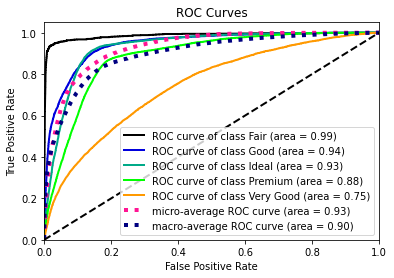

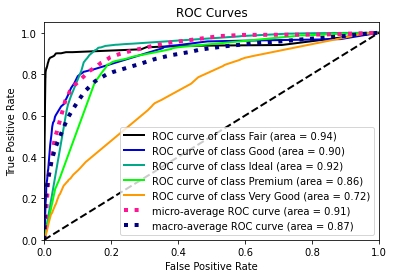

In [116]:
# Comparar os modelos na base de teste

y_pread_rf = grid_rf.predict(x_test)
y_prob_rf = grid_rf.predict_proba(x_test)

y_pread_tree = grid_tree.predict(x_test)
y_prob_tree = grid_tree.predict_proba(x_test)

skplt.metrics.plot_roc(y_test, y_prob_rf)
skplt.metrics.plot_roc(y_test, y_prob_tree)

### Aprendizado!

Regressão logística se dá melhor com variáveis binning do que com variáveis contínuas. Mas não é regra. Se há relação linear com y, usa normalmente a numérica, caso contrário, fica melhor categorizar as variáveis x.